# Import Library yang Diperlukan

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn import tree
import re
import string

# Load Dataset

In [13]:
dataset = pd.read_csv('./dataset/test-dataset.csv')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Melihat Perbandingan Jumlah Data

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

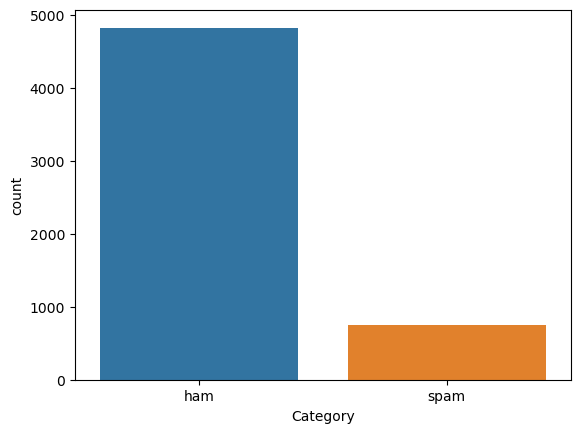

In [14]:
sns.countplot(dataset['Category'])

# Mengubah Kategori (HAM -> 0, SPAM -> 1)

In [15]:
dataset['Category'] = dataset['Category'].map({'ham': 0, 'spam': 1})
dataset.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Membersihkan dataset dengan Preprocessing Text

In [16]:
# Preprocessing
def clean_text(Message):
    Message = Message.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', Message)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return Message

dataset['Message'] = dataset['Message'].apply(clean_text)
dataset.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


# Split Train dan Test Model dari Dataset

In [17]:
# define x and y
X = dataset['Message']
Y = dataset['Category']

# train model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


# Seleksi Fitur dengan TF-IDF

In [18]:
vct = TfidfVectorizer()
X_train_vct = vct.fit_transform(X_train)
X_test_vct = vct.transform(X_test)

# Membuat Model Decision Tree

In [19]:
DT = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
DT.fit(X_train_vct, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Visualisasi Decision Tree

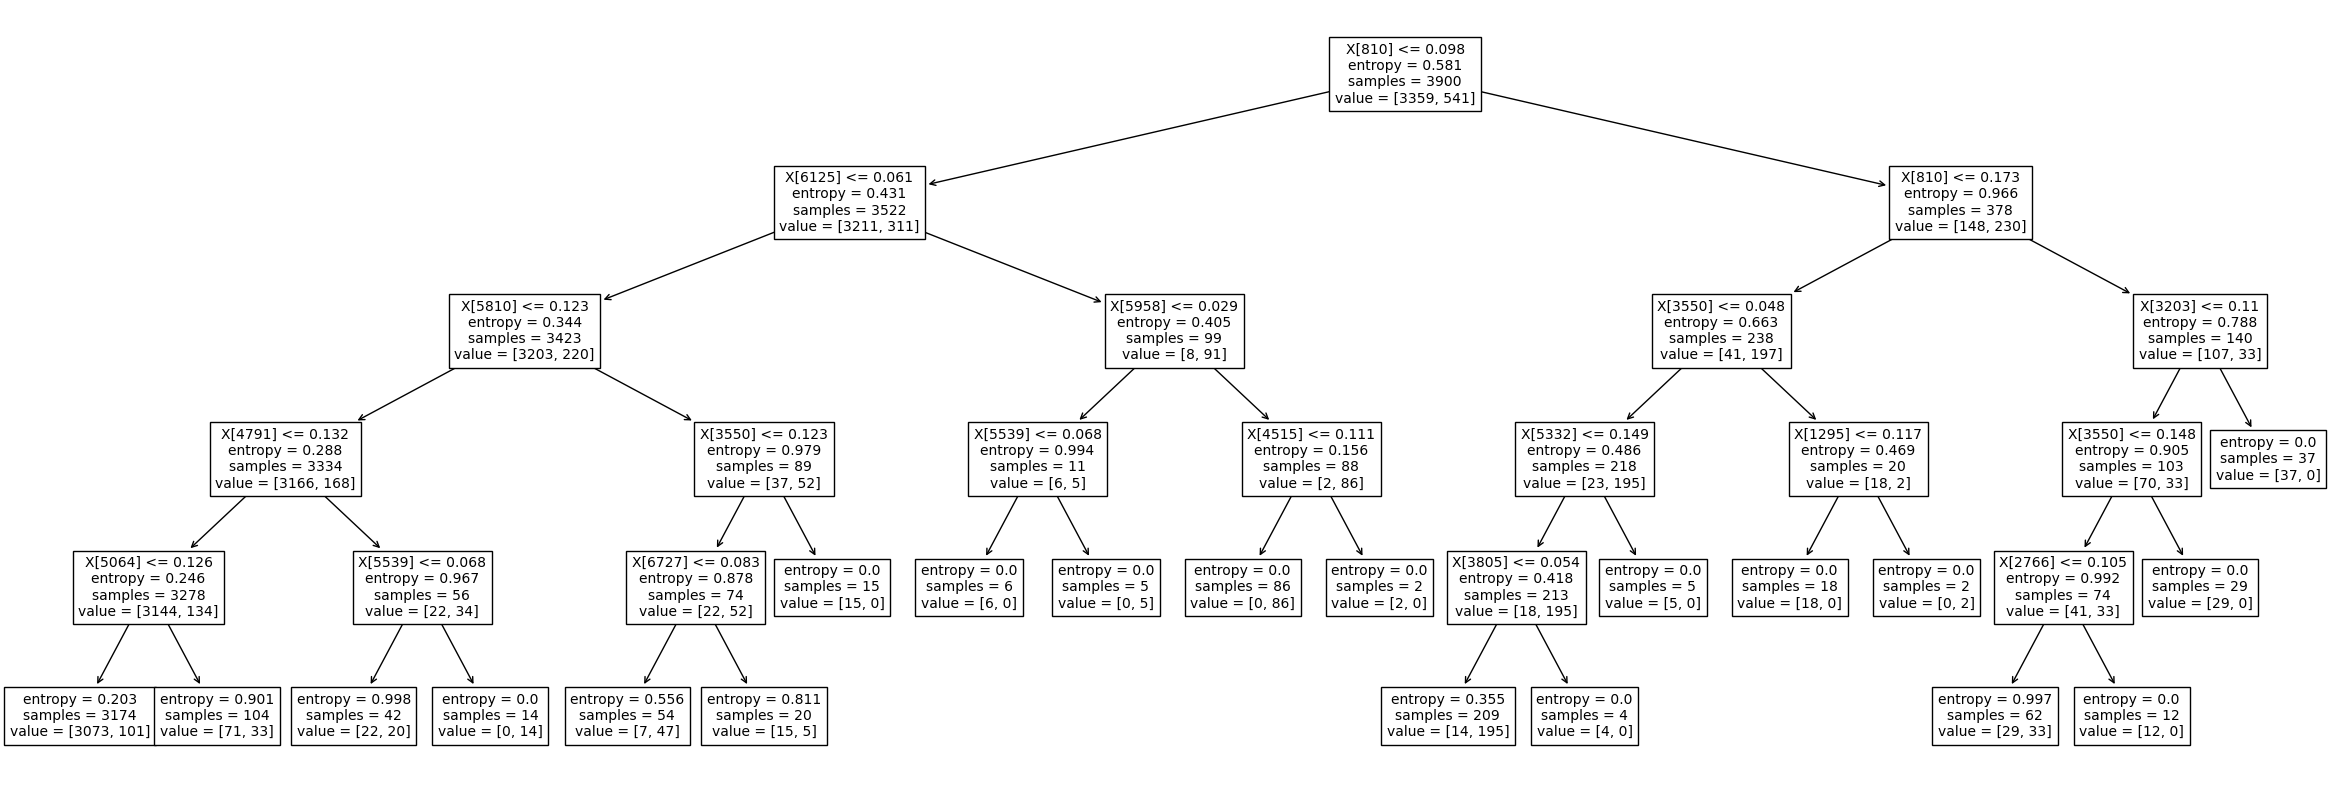

In [20]:
plt.subplots(figsize=(30,10))
tree.plot_tree(DT, fontsize=10)
plt.show()

# Evaluasi Model

In [21]:
y_pred = DT.predict(X_test_vct)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1466
           1       0.86      0.70      0.78       206

    accuracy                           0.95      1672
   macro avg       0.91      0.84      0.87      1672
weighted avg       0.95      0.95      0.95      1672

